# Ajustes para rodar os modelos no colab

In [1]:
! git clone --recursive https://github.com/Microsoft/LightGBM

Cloning into 'LightGBM'...
remote: Enumerating objects: 27692, done.
remote: Counting objects: 100% (290/290), done.
remote: Compressing objects: 100% (198/198), done.
remote: Total 27692 (delta 146), reused 189 (delta 87), pack-reused 27402
Receiving objects: 100% (27692/27692), 19.87 MiB | 2.95 MiB/s, done.
Resolving deltas: 100% (20449/20449), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'external_libs/compute'
Submodule 'eigen' (https://gitlab.com/libeigen/eigen.git) registered for path 'external_libs/eigen'
Submodule 'external_libs/fast_double_parser' (https://github.com/lemire/fast_double_parser.git) registered for path 'external_libs/fast_double_parser'
Submodule 'external_libs/fmt' (https://github.com/fmtlib/fmt.git) registered for path 'external_libs/fmt'
Cloning into '/content/LightGBM/external_libs/compute'...
remote: Enumerating objects: 21733, done.        
remote: Counting objects: 100% (5/5), done.        
remote: Comp

In [2]:
! cd LightGBM && rm -rf build && mkdir build && cd build && cmake -DUSE_GPU=1 ../../LightGBM && make -j4 && cd ../python-package && python3 setup.py install --precompile --gpu;

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Looking for CL_VERSION_2_2
-- Looking for CL_VERSION_2_2 - found
-- Found OpenCL: /usr/lib/x86_64-linux-gnu/libOpenCL.so (found version "2.2") 
-- OpenCL include directory: /usr/include
-- Found Boost: /usr/include (found suitable version "1.65.1", minimum required is "1.56.0") found components: filesystem system 
-- Performing Test MM_PREFET

In [3]:
!pip install -U xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255.9 MB 46 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


#   Bibliotecas

In [4]:
import pandas as pd
import random 
import numpy as np
import re
from scipy.sparse import hstack #utilizada para a junção de matrizes

In [5]:
#Pré processamento de colunas

from sklearn.model_selection import train_test_split #Divisão do dataset entre treino e teste
from sklearn.feature_extraction.text import TfidfVectorizer #vetorização do dataset
from sklearn.preprocessing import OneHotEncoder #aplicação de dummy

In [6]:
#Pré processamento de texto


import nltk
from nltk import word_tokenize #tokenizador
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords   #stopword

nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
#import de funções do arquivo pre_processamento

from pre_processamento import pre_processamento, text_preprocess, textcolumns_junct,stemming

In [8]:
# Modelo a ser testado

from keras.layers import Input, Dense
from keras.models import Model

In [9]:
#metricas

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [10]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

train = pd.read_csv('/content/drive/MyDrive/train.tsv', sep = '\t')
test = pd.read_csv('/content/drive/MyDrive/test.tsv', sep = '\t')

Mounted at /content/drive


In [11]:
train,test = pre_processamento(train,test)

#   Análise estatística

In [12]:
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,27,Men,Tops,T-shirts,6.0,2018.0
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,15,Electronics,Computers & Tablets,Components & Parts,3.0,2018.0
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,14,Women,Tops & Blouses,Blouse,10.0,2018.0
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,1,Home,Home Décor,Home Décor Accents,3.0,2018.0
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,13,Women,Jewelry,Necklaces,5.0,2018.0


In [13]:
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,27,Men,Tops,T-shirts,6.0,2018.0
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,15,Electronics,Computers & Tablets,Components & Parts,3.0,2018.0
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,14,Women,Tops & Blouses,Blouse,10.0,2018.0
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,1,Home,Home Décor,Home Décor Accents,3.0,2018.0
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,13,Women,Jewelry,Necklaces,5.0,2018.0


In [14]:
train.describe()

,item_condition_id,price,shipping,stock,datetime_month,datetime_year
count,1.481661e+06,1.481661e+06,1.481661e+06,1.481661e+06,1.474770e+06,1474770.0
mean,1.907322e+00,2.675329e+01,4.473257e-01,1.178550e+01,6.517894e+00,2018.0
std,9.031759e-01,3.859198e+01,4.972178e-01,1.056099e+01,3.194489e+00,0.0
min,1.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2018.0
25%,1.000000e+00,1.000000e+01,0.000000e+00,4.000000e+00,4.000000e+00,2018.0
50%,2.000000e+00,1.700000e+01,0.000000e+00,9.000000e+00,7.000000e+00,2018.0
75%,3.000000e+00,2.900000e+01,1.000000e+00,1.700000e+01,9.000000e+00,2018.0
max,5.000000e+00,2.009000e+03,1.000000e+00,9.500000e+01,1.200000e+01,2018.0


In [15]:
train.isnull().sum()  #necessário valair forma de tratar os valores nulos.

name                      0
item_condition_id         0
category_name          6314
brand_name           632336
price                     0
shipping                  0
item_description          4
stock                     0
gen_cat                   0
sub1_cat                  0
sub2_cat                  0
datetime_month         6891
datetime_year          6891
dtype: int64

In [16]:
train.duplicated().sum()

0

In [17]:
# train = train.drop(train[~((train['price'] > 0) & (train['price'] < 250))].index)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8dcab0b310>,
      dtype=object)

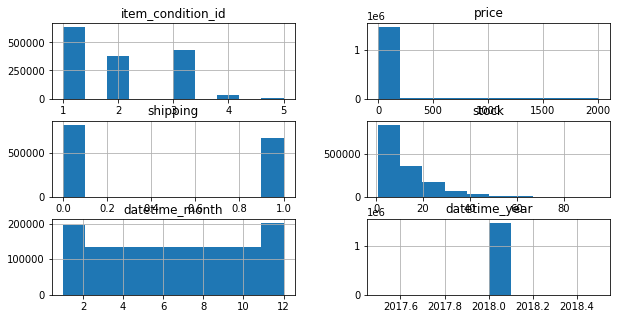

In [18]:
train.hist(figsize=(10,5))

In [19]:
X = train.drop("price", axis = 1)
y = train["price"]

In [20]:
X.shape

(1481661, 12)

#   Pré-processamento 

In [21]:
X = textcolumns_junct(X)

In [22]:
#Convertendo tudo para string

X["item_description"] = X["item_description"].astype(str)

In [23]:
X["item_description"] = X["item_description"].apply(lambda x: text_preprocess(x)) #Limpando texto com regex.


In [24]:
X["item_description"] = X["item_description"].apply(lambda x: word_tokenize(x)) #tokenizando

In [25]:
X["item_description"] = X["item_description"].apply(lambda x: stemming(x))

In [26]:
X["item_description"]=[" ".join(review) for review in X["item_description"].values]

In [27]:
X.head()

,item_condition_id,category_name,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
0,3,Men/Tops/T-shirts,1,mlb cincinnati red shirt size xl descript yet,27,Men,Tops,T-shirts,6.0,2018.0
1,3,Electronics/Computers & Tablets/Components & P...,0,razer blackwidow chroma keyboard razer keyboar...,15,Electronics,Computers & Tablets,Components & Parts,3.0,2018.0
2,1,Women/Tops & Blouses/Blouse,1,ava viv blous target ador top hint lace key ho...,14,Women,Tops & Blouses,Blouse,10.0,2018.0
3,1,Home/Home Décor/Home Décor Accents,1,leather hors statu new tag . leather hors . re...,1,Home,Home Décor,Home Décor Accents,3.0,2018.0
4,1,Women/Jewelry/Necklaces,0,24k gold plate rose complet certif authent,13,Women,Jewelry,Necklaces,5.0,2018.0


In [28]:
X["item_description"]

0              mlb cincinnati red shirt size xl descript yet
1          razer blackwidow chroma keyboard razer keyboar...
2          ava viv blous target ador top hint lace key ho...
3          leather hors statu new tag . leather hors . re...
4                 24k gold plate rose complet certif authent
                                 ...                        
1482530    free peopl inspir dress free peopl lace say si...
1482531    littl mermaid handmad dress disney littl merma...
1482532    21 day fix contain eat plan use twice still gr...
1482533    world market lantern 2 one see 2 red 2 orang 2...
1482534    brand new lux de vill wallet new tag red spark...
Name: item_description, Length: 1481661, dtype: object

#   Split

In [29]:
#Separação em treino e teste para começarmos as transformaçõs, protegendo nossos dados de validação de possíveis vazamentos. 

Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.2, random_state=10) #Divisão em 80/20

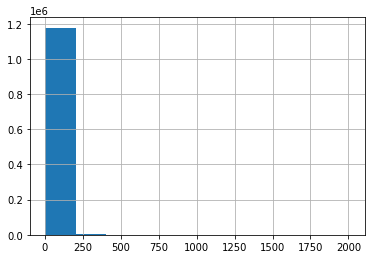

In [30]:
#Normalizando, com log, o target (price), foi realizado de forma separada para nao terem dados vazados.

ytrain_log =  np.log1p(ytrain)
yval_log =  np.log1p(yval)
ytrain.hist()

# Transformadores

In [31]:
vec = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df = 50, max_df = 0.5) #vetorização, com stop word. 

In [32]:
vec_train = vec.fit_transform(Xtrain["item_description"])

vec_train

<1185328x66125 sparse matrix of type '<class 'numpy.float64'>'
	with 30866302 stored elements in Compressed Sparse Row format>

In [33]:
vec_val = vec.transform(Xval["item_description"])

vec_val

<296333x66125 sparse matrix of type '<class 'numpy.float64'>'
	with 7693221 stored elements in Compressed Sparse Row format>

In [34]:
ohe = OneHotEncoder(handle_unknown="ignore")

#aplicação dummy nas colunas categóricas.

ohe_train = ohe.fit_transform(Xtrain[["item_condition_id",   
                                         "shipping",
                                         "gen_cat",
                                         "sub1_cat",
                                         "sub2_cat",
                                         "datetime_month"]])
                            
ohe_train

<1185328x1008 sparse matrix of type '<class 'numpy.float64'>'
	with 7111968 stored elements in Compressed Sparse Row format>

In [35]:
ohe_val = ohe.transform(Xval[["item_condition_id",   
                                         "shipping",
                                         "gen_cat",
                                         "sub1_cat",
                                         "sub2_cat",
                                         "datetime_month"]])

ohe_val

<296333x1008 sparse matrix of type '<class 'numpy.float64'>'
	with 1777987 stored elements in Compressed Sparse Row format>

In [36]:
#juntando cada matrix gerada por cada pré-processamento

x_train = hstack([
                 (vec_train),
                 (ohe_train)
                 	
                                     ],format='csr') 
x_train

<1185328x67133 sparse matrix of type '<class 'numpy.float64'>'
	with 37978270 stored elements in Compressed Sparse Row format>

In [37]:
x_val = hstack([
                 (vec_val),
                 (ohe_val)
                             ], format='csr') 
x_val

<296333x67133 sparse matrix of type '<class 'numpy.float64'>'
	with 9471208 stored elements in Compressed Sparse Row format>

# MLP

In [38]:
from tensorflow.keras.backend import clear_session

clear_session()

In [39]:
from keras.layers import Input, Dense
from keras.models import Model

input = Input(shape=(x_train.shape[-1]), sparse=True, name='sparse')
dense3 = Dense(1024, activation="relu") (input)
dense4 = Dense(512, activation="relu") (dense3)
dense5 = Dense(256, activation="relu") (dense4)
out = Dense(1) (dense5)

model = Model(inputs = input, outputs = out)

model.summary()

#Tentar dropar os bundles

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sparse (InputLayer)         [(None, 67133)]           0         
                                                                 
 dense (Dense)               (None, 1024)              68745216  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 69,401,601
Trainable params: 69,401,601
Non-trainable params: 0
_________________________________________________________________


In [40]:
ytrain.values.shape

(1185328,)

In [41]:
from tensorflow.keras.metrics import RootMeanSquaredError

model.compile(loss="mean_squared_error", metrics=['mean_absolute_error','mean_squared_error', 'mean_squared_logarithmic_error', RootMeanSquaredError()], optimizer = 'adam')
history1 = model.fit(x_train, ytrain_log.values, batch_size=2048, epochs=10, verbose=True)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 1024), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


579/579 [==============================] - 43s 62ms/step - loss: 0.3132 - mean_absolute_error: 0.3968 - mean_squared_error: 0.3132 - mean_squared_logarithmic_error: 0.0253 - root_mean_squared_error: 0.5597
Epoch 2/10
579/579 [==============================] - 39s 63ms/step - loss: 0.1805 - mean_absolute_error: 0.3197 - mean_squared_error: 0.1805 - mean_squared_logarithmic_error: 0.0114 - root_mean_squared_error: 0.4249
Epoch 3/10
579/579 [==============================] - 39s 63ms/step - loss: 0.1306 - mean_absolute_error: 0.2712 - mean_squared_error: 0.1306 - mean_squared_logarithmic_error: 0.0084 - root_mean_squared_error: 0.3614
Epoch 4/10
579/579 [==============================] - 39s 63ms/step - loss: 0.0848 - mean_absolute_error: 0.2171 - mean_squared_error: 0.0848 - mean_squared_logarithmic_error: 0.0055 - root_mean_squared_error: 0.2912
Epoch 5/10
579/579 [==============================] - 39s 63ms/step - loss: 0.0548 - mean_absolute_error: 0.1728 - mean_squared_error: 0.0548 -

In [42]:
print("\n")
scoreMLP = model.evaluate(x_val, yval_log.values)
print(model.metrics_names)
print("mse: ", scoreMLP[1])
print("msle: ", scoreMLP[2])
print("rmse: ", scoreMLP[3])



9261/9261 [==============================] - 33s 4ms/step - loss: 0.2265 - mean_absolute_error: 0.3566 - mean_squared_error: 0.2265 - mean_squared_logarithmic_error: 0.0143 - root_mean_squared_error: 0.4759
['loss', 'mean_absolute_error', 'mean_squared_error', 'mean_squared_logarithmic_error', 'root_mean_squared_error']
mse:  0.35655850172042847
msle:  0.2264573872089386
rmse:  0.014255349524319172


In [43]:
import math
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

In [44]:
y_pred = np.expm1(model.predict(x_val))

print('MLP')
print(mean_absolute_error(yval,y_pred))
print(mean_squared_error(yval,y_pred))
print(mean_squared_log_error(yval,y_pred))

MLP
10.546949903299131
793.4765701235713
0.2264574632599648


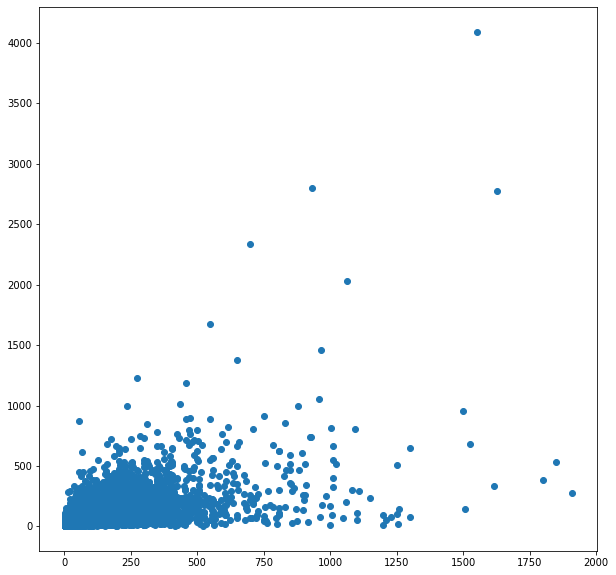

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(x=yval, y=y_pred)

# XGBoost

In [46]:
from xgboost import XGBRegressor

xgb = XGBRegressor(gpu_id = "0",
                   tree_method="gpu_hist",
                   random_state = 10
                   )

In [47]:
model = xgb.fit(x_train, ytrain_log.values)

In [48]:
ypredict = model.predict(x_val)

In [49]:
ypredict = np.expm1(ypredict)

In [50]:
from sklearn.metrics import mean_squared_log_error

In [52]:
print('MAE: %2f' % mean_absolute_error(yval,ypredict))
print('RMSE: %2f' % (mean_squared_error(yval,ypredict)))
print('RMSLE: %2f' % mean_squared_log_error(yval,ypredict))


MAE: 11.842656
RMSE: 962.045743
RMSLE: 0.279296


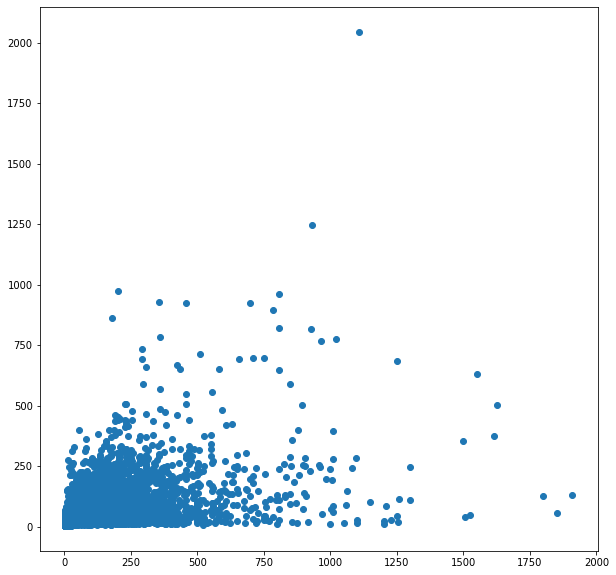

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(x=yval, y=ypredict)

# LGBM

In [55]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(device = "gpu", random_state=10)

In [56]:
model = lgb.fit(x_train, ytrain_log.values)

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1182619
[LightGBM] [Info] Number of data points in the train set: 1185328, number of used features: 66862
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 4 dense feature groups (4.52 MB) transferred to GPU in 0.010268 secs. 1 sparse feature groups
[LightGBM] [Info] Start training from score 2.980535


In [57]:
ypredict_train = model.predict(x_train)

In [ ]:
ypredict_train = np.expm1(ypredict_train)

In [58]:
ypredict = model.predict(x_val)

In [59]:
ypredict = np.expm1(ypredict)

In [60]:
from sklearn.metrics import mean_squared_log_error

- predict validação

In [61]:
print('MAE: %2f' % mean_absolute_error(yval,ypredict))
print('RMSE: %2f' % (mean_squared_error(yval,ypredict)))
print('RMSLE: %2f' % mean_squared_log_error(yval,ypredict))


MAE: 12.075911
RMSE: 1030.371047
RMSLE: 0.287530


- predict treino

In [62]:
print('MAE_train: %2f' % mean_absolute_error(ytrain,ypredict_train))
print('RMSE_train: %2f' % (mean_squared_error(ytrain,ypredict_train)))
print('RMSLE_train: %2f' % mean_squared_log_error(ytrain,ypredict_train))

MAE_train: 23.778219
RMSE_train: 2044.373962
RMSLE_train: 3.030503


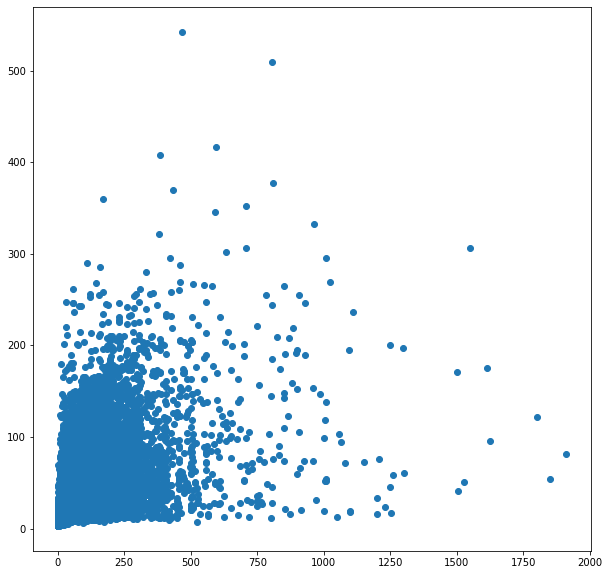

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(x=yval, y=ypredict)